# Определение перспективного тарифа для телеком-компании

[Описание проекта](#0)

[1 Изучение общей информации:](#1)
- [1.1 Исследуем calls.csv:](#1.1)
- [1.2 Исследуем internet.csv](#1.2)
- [1.3 Исследуем messages.csv](#1.3)
- [1.4 Исследуем tariffs.csv](#1.4)
- [1.5 Исследуем users.csv](#1.5)
- [1.6 Вывод](#1.6)

[2 Подготовка данных](#2)
- [2.1 Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:](#2.1)
- [2.2 Расчет количества отправленных сообщений по месяцам для каждого пользователя:](#2.2)
- [2.3 Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя:](#2.3)
- [2.4 Расчет помесячной выручку с каждого пользователя:](#2.4)
- [2.5 Вывод](#2.5)

[3 Анализ данных](#3)
- [3.1 Анализ звонков](#3.1)
- [3.2 Анализ сообщений по тарифам](#3.2)
- [3.3 Анализ трафика по тарифам](#3.3)
- [3.4 Общий анализ](#3.4)
- [3.5 Вывод](#3.5)

[4 Проверка гипотез](#4)
- [4.1 Cредняя выручка абонентов тарифов «Ультра» и «Смарт» различаются](#4.1)
- [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4.2)

[5 Вывод](#5)



<a name="0"></a>
Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:
Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

 Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.




Описание данных
Таблица _users_ (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Таблица _calls_ (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица _messages_ (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица _tariffs_ (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a name="1"></a>
## Изучение общей информации:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mplt

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


calls = pd.read_csv(r'datasets/calls.csv')
internet = pd.read_csv(r'datasets/internet.csv', index_col=0)
messages = pd.read_csv(r'datasets/messages.csv')
tariffs = pd.read_csv(r'datasets/tariffs.csv')
users = pd.read_csv(r'datasets/users.csv')



<a name="1.1"></a>
### Исследуем calls.csv:

In [3]:
display('______________info_____________________')
display(calls.info())
display('______________describe_________________')
display(users.describe())
display('______________head_____________________')
display(calls.head(10))
display('______________sample___________________')
display(calls.sample(5))
display('_____________isnull____________________')
display(calls.isnull().sum())
display('_____________duplicated________________')
display(users.duplicated().sum())


'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

'______________describe_________________'

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'______________head_____________________'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


'______________sample___________________'

,id,call_date,duration,user_id
58762,1148_225,2018-11-16,15.12,1148
9222,1024_253,2018-11-29,13.76,1024
87421,1219_190,2018-12-31,12.27,1219
69569,1174_609,2018-04-10,2.85,1174
59872,1150_182,2018-10-09,2.55,1150


'_____________isnull____________________'

id           0
call_date    0
duration     0
user_id      0
dtype: int64

'_____________duplicated________________'

0

In [4]:
# нулевые значения в длительности
calls[calls['duration'] == 0].count().to_frame()

,0
id,39613
call_date,39613
duration,39613
user_id,39613


In [5]:
# звонки, продолжительностью более 0 минут
calls.query('duration != 0').count()

id           162994
call_date    162994
duration     162994
user_id      162994
dtype: int64

<a name="1.2"></a>
### Исследуем internet.csv

In [6]:
display('______________info_____________________')
display(internet.info())
display('______________describe_________________')
display(internet.describe())
display('______________head_____________________')
display(internet.head(10))
display('______________sample___________________')
display(internet.sample(5))
display('_____________isnull____________________')
display(internet.isnull().sum())
display('_____________duplicated________________')
display(internet.duplicated().sum())


'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

'______________describe_________________'

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


'______________head_____________________'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


'______________sample___________________'

,id,mb_used,session_date,user_id
78181,1263_252,565.24,2018-06-05,1263
117238,1394_196,715.27,2018-01-22,1394
117945,1395_629,0.00,2018-12-21,1395
3303,1011_170,219.29,2018-03-22,1011
147536,1493_75,296.32,2018-12-12,1493


'_____________isnull____________________'

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

'_____________duplicated________________'

0

In [7]:
# соединения без трафика
internet[internet['mb_used'] == 0].count().to_frame()

,0
id,19598
mb_used,19598
session_date,19598
user_id,19598


<a name="1.3"></a>
### Исследуем messages:

In [8]:
display('______________info_____________________')
display(messages.info())
display('______________describe_________________')
display(messages.describe())
display('______________head_____________________')
display(messages.head(10))
display('______________sample___________________')
display(messages.sample(5))
display('_____________isnull____________________')
display(messages.isnull().sum())
display('_____________duplicated________________')
display(messages.duplicated().sum())


'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

'______________describe_________________'

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'______________head_____________________'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


'______________sample___________________'

,id,message_date,user_id
4249,1015_514,2018-12-31,1015
79402,1332_22,2018-10-25,1332
33182,1145_835,2018-11-12,1145
89279,1373_291,2018-10-25,1373
19532,1086_218,2018-10-05,1086


'_____________isnull____________________'

id              0
message_date    0
user_id         0
dtype: int64

'_____________duplicated________________'

0

<a name="1.4"></a>
### Исследуем tariffs:

In [9]:
display('______________info_____________________')
display(tariffs.info())
display('______________describe_________________')
display(tariffs.describe())
display('______________head_____________________')
display(tariffs.head(10))
display('_____________isnull____________________')
display(tariffs.isnull().sum())
display('_____________duplicated________________')
display(tariffs.duplicated().sum())
display('___________value_counts________________')
display(users['tariff'].value_counts())


'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

'______________describe_________________'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


'______________head_____________________'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'_____________isnull____________________'

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

'_____________duplicated________________'

0

'___________value_counts________________'

smart    351
ultra    149
Name: tariff, dtype: int64

<a name="1.5"></a>
### Исследуем users:

In [10]:
display('______________info_____________________')
display(users.info())
display('______________describe_________________')
display(users.describe())
display('______________head_____________________')
display(users.head(10))
display('______________sample___________________')
display(users.sample(5))
display('_____________isnull____________________')
display(users.isnull().sum())
display('_____________duplicated________________')
display(users.duplicated().sum())


'______________info_____________________'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

'______________describe_________________'

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'______________head_____________________'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


'______________sample___________________'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
200,1200,36,NaN,Санкт-Петербург,Тамара,Ларионова,2018-04-28,ultra
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
118,1118,65,NaN,Казань,Вера,Латышева,2018-03-06,smart
353,1353,57,2018-11-26,Санкт-Петербург,Доминика,Анищенко,2018-04-22,smart
247,1247,19,NaN,Москва,Адам,Тарасов,2018-05-23,smart


'_____________isnull____________________'

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

'_____________duplicated________________'

0

<a name="1.6"></a>
### Вывод:

- в данных содержится информация о 500 абонентах.
- 351 абонент пользуется тарифом «Смарт»
- 149 абонентов пользуются тарифом «Ультра»
- 462 NaN значения содержит колонка churn_date (дата прекращения пользования тарифом)
- необходимо привести к формату DateTime: call_date, session_date, message_date, churn_date, reg_date
- в calls есть звонки с 0 продолжительностью (это пропущенные вызовы)
- в internet колонка `Unnamed: 0` дублирует индекс строк
- дубликатов нет во всех данных




<a name="2"></a>
## Подготовка данных:

Приведем к формату DateTime: call_date, session_date, message_date, churn_date, reg_date

In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
users['reg_date'].head()

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
users['churn_date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
calls['call_date'].head()

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
messages['message_date'].head()

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
internet['session_date'].head()

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

In [21]:
internet['month'] = internet['session_date'].dt.month

In [22]:
internet['month'].head()

0    11
1     9
2     6
3     8
4     9
Name: month, dtype: int64

Приведем значения `id` к целочисленному виду:

In [23]:
calls['id'] = calls['id'].astype(int)

In [24]:
#Удалим повторяющиеся данные из таблицы internet:
#internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

Округлим в большую сторону звонки, согласно условию:

In [25]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype(int)
calls.sample(10).T

,1488,145952,118481,147004,77666,56462,202425,198541,74331,68401
id,100585,1372130,130623,1374438,119581,1143526,149938,14883,1186153,1173134
call_date,2018-06-20 00:00:00,2018-10-20 00:00:00,2018-12-21 00:00:00,2018-10-13 00:00:00,2018-11-05 00:00:00,2018-11-13 00:00:00,2018-10-26 00:00:00,2018-12-13 00:00:00,2018-10-04 00:00:00,2018-08-13 00:00:00
duration,9,12,4,19,5,2,0,0,8,6
user_id,1005,1372,1306,1374,1195,1143,1499,1488,1186,1173


In [26]:
calls['duration'].dtypes

dtype('int32')

Добавим в таблицу calls столбец с месяцем:

In [27]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.sample(10).T

,38170,71277,93322,104400,132657,977,94953,13995,24186,165494
id,1094790,117837,12343,1267392,1340631,1003270,1240481,1036169,1061266,1409119
call_date,2018-11-19 00:00:00,2018-05-19 00:00:00,2018-12-29 00:00:00,2018-09-21 00:00:00,2018-06-06 00:00:00,2018-11-15 00:00:00,2018-09-17 00:00:00,2018-12-03 00:00:00,2018-08-20 00:00:00,2018-05-06 00:00:00
duration,11,10,25,13,11,2,16,8,13,21
user_id,1094,1178,1234,1267,1340,1003,1240,1036,1061,1409
month,11,5,12,9,6,11,9,12,8,5


Добавим в табллицу internet колонку с траффиком в Гб, округлив до большего значения, согласно условию:

In [28]:
internet['gb_used'] = (internet['mb_used'] / 1024)
internet['gb_used'].head(10).to_frame().T

,0,1,2,3,4,5,6,7,8,9
gb_used,0.110303,1.028135,1.169199,0.537373,0.295469,0.390596,0.527422,0.405957,0.493555,0.337441


Добавим в таблицу internrt столбец с месяцем:

In [29]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.sample(10).T

,28628,101196,12668,115689,135541,7762,43608,65105,22919,68653
id,1099_292,1339_175,1044_305,1390_137,1454_232,1027_89,1150_38,1221_218,1076_559,1233_112
mb_used,802.74,0.6,259.01,79.27,10.13,262.8,201.37,51.9,295.65,75.97
session_date,2018-05-05 00:00:00,2018-11-15 00:00:00,2018-12-14 00:00:00,2018-11-28 00:00:00,2018-08-19 00:00:00,2018-08-03 00:00:00,2018-10-04 00:00:00,2018-10-15 00:00:00,2018-06-26 00:00:00,2018-09-29 00:00:00
user_id,1099,1339,1044,1390,1454,1027,1150,1221,1076,1233
month,5,11,12,11,8,8,10,10,6,9
gb_used,0.783926,0.000586,0.252939,0.077412,0.009893,0.256641,0.19665,0.050684,0.288721,0.074189


Добавим в таблицу messages колонку с месяцем:

In [30]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.sample(10).T

,75803,649,65738,105165,109781,2676,16687,17273,31704,115293
id,1321_81,1003_83,1282_170,1425_409,1440_722,1005_538,1072_185,1076_422,1142_223,1471_521
message_date,2018-05-27 00:00:00,2018-10-10 00:00:00,2018-02-23 00:00:00,2018-05-10 00:00:00,2018-05-30 00:00:00,2018-01-27 00:00:00,2018-04-26 00:00:00,2018-11-09 00:00:00,2018-10-20 00:00:00,2018-12-11 00:00:00
user_id,1321,1003,1282,1425,1440,1005,1072,1076,1142,1471
month,5,10,2,5,5,1,4,11,10,12


Добавим в таблицу users колонку с месяцем подключения:

In [31]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
403,1403,18,NaT,Брянск,Ахмет,Амелин,2018-05-20,ultra,5
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10
100,1100,58,NaT,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart,7
58,1058,66,NaT,Вологда,Лукий,Глушков,2018-10-07,smart,10
178,1178,56,NaT,Москва,Наталья,Жарова,2018-05-15,smart,5


Добавим в таблицу users колонку с месяцем отключения:

In [32]:
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
249,1249,25,NaT,Курск,Изольда,Авдушева,2018-08-14,smart,8,NaN
396,1396,23,NaT,Пенза,Эльга,Савельева,2018-01-12,ultra,1,NaN
383,1383,41,NaT,Ульяновск,Юна,Сомова,2018-10-24,smart,10,NaN
256,1256,55,NaT,Санкт-Петербург,Алевтина,Панфилова,2018-09-28,smart,9,NaN
284,1284,62,NaT,Волгоград,Евфросинья,Петухова,2018-03-16,smart,3,NaN


Изменим данные в tariffs, согласно условию:

In [33]:
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024)
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].astype(int)
tariffs['gb_per_month_included'].head(15).to_frame().T

,0,1
gb_per_month_included,15,30


Посчитаем нулевые значения длительности звонков в таблице calls:

In [34]:
calls[calls['duration'] == 0]['duration'].count()

39613

In [35]:
calls.query('duration == 0')

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
5,10005,2018-11-02,0,1000,11
6,10006,2018-10-18,0,1000,10
9,10009,2018-08-15,0,1000,8
...,...,...,...,...,...
202590,1499203,2018-12-03,0,1499,12
202592,1499205,2018-10-13,0,1499,10
202593,1499206,2018-12-26,0,1499,12
202594,1499207,2018-10-28,0,1499,10


In [36]:
#calls = calls.drop(calls[calls['duration'] == 0].index)
#calls[calls['duration'] == 0]['duration'].count()

По првилу тарификации компании "Мегалайн", звонки с 0 продолжительностью это пропущенные вызовы.\
Удулять нулевые значения не будем, т.к.эти данные могут пригодится для дальнейшего анализа

Отобразим нулевые значения потраченного за сессию интернет-трафика таблицы calls:

In [37]:
internet[internet['mb_used'] == 0]['mb_used'].count()

19598

In [38]:
#internet = internet.drop(internet[internet['mb_used'] == 0].index)

In [39]:
internet.query('mb_used == 0')['mb_used'].count()

19598

In [40]:
internet[internet['mb_used'] == 0]

,id,mb_used,session_date,user_id,month,gb_used
11,1000_11,0.0,2018-08-28,1000,8,0.0
38,1000_38,0.0,2018-11-27,1000,11,0.0
46,1000_46,0.0,2018-06-30,1000,6,0.0
67,1000_67,0.0,2018-06-16,1000,6,0.0
72,1000_72,0.0,2018-06-15,1000,6,0.0
...,...,...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499,12,0.0
149381,1499_142,0.0,2018-11-01,1499,11,0.0
149383,1499_144,0.0,2018-11-27,1499,11,0.0
149386,1499_147,0.0,2018-10-21,1499,10,0.0


Видимм, что некоторые абоненты периодически не используют доступ в сеть интернет.\
По правилу компании "Мегалайн" для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.\
Удалять нулевые значения не будем, т.к.эти данные могут пригодиться для дальнейшего анализа

<a name="2.1"></a>
### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:

In [41]:
#users_calls_month = pd.pivot_table(calls, index=['user_id','month'], values=['duration','id'],
#                                   aggfunc={'duration':sum,'id':'count'}).reset_index()
#users_calls_month.columns = ['user_id', 'month', 'duration_month', 'count_calls']

##users_calls_month.rename(columns={'user_id':'id_пользователя','id':'количество_звонков',
##                                  'duration':'длительность_звонков', 'month':'месяц'}, inplace=True)

users_calls_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
users_calls_month.columns = ['user_id', 'month', 'duration_month', 'count_calls']


users_calls_month.head(10)

,user_id,month,duration_month,count_calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
5,1000,10,350,57
6,1000,11,338,43
7,1000,12,333,46
8,1001,11,430,59
9,1001,12,414,63


<a name="2.2"></a>
### Расчет количества отправленных сообщений по месяцам для каждого пользователя:

In [42]:
#users_messages_month = pd.pivot_table(messages, index=['user_id','month'], values=['id'], aggfunc='count').reset_index()
##users_messages_month.rename(columns={'user_id':'id_пользователя', 'month':'месяц', 'id':'кол-во_сообщений'}, inplace=True)
#users_messages_month.columns = ['user_id', 'month',  'count_sms']

users_messages_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
users_messages_month.columns = ['user_id', 'month',  'count_sms']

users_messages_month.sample(10)

,user_id,month,count_sms
216,1039,10,140
1876,1357,11,48
756,1144,9,55
1373,1268,9,50
2097,1394,4,6
1336,1263,5,10
2145,1401,8,41
1559,1302,5,80
1868,1356,7,144
1057,1199,10,72


<a name="2.3"></a>

### Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя:

In [43]:
#users_internet_month = pd.pivot_table(internet, index=['user_id','month'], values=['gb_used'], aggfunc=sum).reset_index()
##users_internet_month.rename(columns={'user_id':'id_пользователя', 'month':'месяц', 'gb_used':'кол-во_gb'}, inplace=True)

users_internet_month = internet.groupby(['user_id', 'month']).agg({'gb_used':'sum'}).reset_index()

users_internet_month.sample(10)

,user_id,month,gb_used
439,1068,9,20.569697
1144,1178,10,13.202119
2853,1447,10,18.466787
2120,1335,12,12.147793
2411,1380,10,36.124590
2425,1381,12,21.425859
3064,1477,6,21.929951
832,1130,8,16.547256
2930,1458,4,14.004717
1463,1228,9,11.191611


<a name="2.4"></a>

### Расчет помесячной выручку с каждого пользователя:

Сгруппируем таблицу расходов за месяц (по звонкам, сообщениям и трафику):

In [44]:
#df_calls_messages = users_calls_month.merge(users_messages_month, how = 'outer')

df_month = users_calls_month.merge(users_messages_month, on=['user_id','month'], how='outer')

In [45]:
#df_month = df_calls_messages.merge(users_internet_month, on=['user_id','month'], how = 'outer')

df_month = df_month.merge(users_internet_month, on=['user_id','month'], how = 'outer')


df_month.head(10)

,user_id,month,duration_month,count_calls,count_sms,gb_used
0,1000,5,159.0,22.0,22.0,2.200674
1,1000,6,172.0,43.0,60.0,22.689229
2,1000,7,340.0,47.0,75.0,13.675430
3,1000,8,408.0,52.0,81.0,13.726494
4,1000,9,466.0,58.0,57.0,14.227451
5,1000,10,350.0,57.0,73.0,14.357900
6,1000,11,338.0,43.0,58.0,14.410615
7,1000,12,333.0,46.0,70.0,9.587510
8,1001,11,430.0,59.0,NaN,17.997402
9,1001,12,414.0,63.0,NaN,13.707676


In [46]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   duration_month  3174 non-null   float64
 3   count_calls     3174 non-null   float64
 4   count_sms       2717 non-null   float64
 5   gb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Проверим таблицу на наличие пропусков:

In [47]:
df_month.isna().sum()

user_id             0
month               0
duration_month     40
count_calls        40
count_sms         497
gb_used            11
dtype: int64

In [48]:
#df_month[df_month['count_calls'].isna()==True]

Заменим пропуски нулями, т.к. возможно эти абоненты не пользовались указанными типами связи.

In [49]:
df_month['duration_month'] = df_month['duration_month'].fillna(0).astype(int)
df_month['count_calls'] = df_month['count_calls'].fillna(0).astype(int)
df_month['count_sms'] = df_month['count_sms'].fillna(0).astype(int)
df_month['gb_used'] = df_month['gb_used'].fillna(0).astype(int)

Сгруппируем таблицу расходов за месяц с остальными данными:

In [50]:
#df_month_all = df_month.merge(users_internet_month, on=['user_id','month'], how='outer')
#df_month_all = df_month_all.merge(users, on='user_id', how='outer')

df_month = df_month.merge(users, on='user_id', how='left')

df_month.head(10)

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,5,159,22,22,2,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1000,6,172,43,60,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
2,1000,7,340,47,75,13,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
3,1000,8,408,52,81,13,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
4,1000,9,466,58,57,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
5,1000,10,350,57,73,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
6,1000,11,338,43,58,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
7,1000,12,333,46,70,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
8,1001,11,430,59,0,17,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
9,1001,12,414,63,0,13,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN


Отобразим информацию из таблицы `tariffs`

In [51]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


Переименуем столбец `tariff_name`, для группировки

In [52]:

tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

Сгруппируем финальную таблицу:

In [53]:
#df_month_all = df_month_all.join(tariffs, how='outer')

df_all = df_month.merge(tariffs, on='tariff', how='left')
df_all.tail(10)

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
3204,1473,9,0,0,19,16,18,NaT,Красноярск,Николай,...,8,NaN,1000,30720,3000,1950,150,1,1,30
3205,1473,10,0,0,20,13,18,NaT,Красноярск,Николай,...,8,NaN,1000,30720,3000,1950,150,1,1,30
3206,1473,11,0,0,14,21,18,NaT,Красноярск,Николай,...,8,NaN,1000,30720,3000,1950,150,1,1,30
3207,1473,12,0,0,20,17,18,NaT,Красноярск,Николай,...,8,NaN,1000,30720,3000,1950,150,1,1,30
3208,1489,8,0,0,17,10,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3209,1489,9,0,0,32,16,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3210,1489,10,0,0,21,19,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3211,1489,11,0,0,20,17,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3212,1489,12,0,0,35,16,35,NaT,Санкт-Петербург,Павел,...,8,NaN,50,15360,500,550,200,3,3,15
3213,1476,4,0,0,0,0,50,NaT,Москва,Валентина,...,4,NaN,1000,30720,3000,1950,150,1,1,30


In [54]:
df_all.head()

,user_id,month,duration_month,count_calls,count_sms,gb_used,age,churn_date,city,first_name,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159,22,22,2,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
1,1000,6,172,43,60,22,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
2,1000,7,340,47,75,13,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
3,1000,8,408,52,81,13,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30
4,1000,9,466,58,57,14,52,NaT,Краснодар,Рафаил,...,5,NaN,1000,30720,3000,1950,150,1,1,30


In [55]:
df_all.columns

Index(['user_id', 'month', 'duration_month', 'count_calls', 'count_sms',
       'gb_used', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'reg_month', 'churn_month', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'gb_per_month_included'],
      dtype='object')

Данные в столбцах `first_name` и `last_name` для анализа не пригодны, удалим их:

In [56]:
df_all.drop('first_name', axis=1, inplace=True)

In [57]:
df_all.drop('last_name', axis=1, inplace=True)

In [58]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration_month         3214 non-null   int32         
 3   count_calls            3214 non-null   int32         
 4   count_sms              3214 non-null   int32         
 5   gb_used                3214 non-null   int32         
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   reg_date               3214 non-null   datetime64[ns]
 10  tariff                 3214 non-null   object        
 11  reg_month              3214 non-null   int64         
 12  churn_month            187 non-null    float64       
 13  mes

Отобразим пропуски в финальной таблице:

In [59]:
df_all.isna().sum()

user_id                     0
month                       0
duration_month              0
count_calls                 0
count_sms                   0
gb_used                     0
age                         0
churn_date               3027
city                        0
reg_date                    0
tariff                      0
reg_month                   0
churn_month              3027
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

Пропуски в churn_date и churn_month логичны и не требуют вмешательства, т.к. это дата и месяц прекращения пользования тарифом. Если данные по этим колонкам отсутствуют, значит абонент еще использует тарифный план.

Определим помесячную выручку `profit_month` с каждого пользователя:

In [60]:
def above_tariff(row):
    sms = (row['count_sms'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration_month'] - row['minutes_included']) * row['rub_per_minute']
    gbs = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, gbs]:
        if i > 0:
            total += i
    return total

df_all['above_tariff'] = df_all.apply(lambda x: above_tariff(x), axis=1)# переплата

df_all['profit_month'] = df_all['rub_monthly_fee'] + df_all['above_tariff']# прибыль за месяц



Отобразим таблицу с платежами абонентов:

In [61]:
users_pays = df_all[['user_id', 'tariff', 'rub_monthly_fee', 'above_tariff', 'profit_month']]
users_pays.columns = ['user_id', 'Тариф', 'Ежемесячная абонентская плата в рублях', 'Переплата',  'Плата за месяц']
users_pays.head(10)

,user_id,Тариф,Ежемесячная абонентская плата в рублях,Переплата,Плата за месяц
0,1000,ultra,1950,0,1950
1,1000,ultra,1950,0,1950
2,1000,ultra,1950,0,1950
3,1000,ultra,1950,0,1950
4,1000,ultra,1950,0,1950
5,1000,ultra,1950,0,1950
6,1000,ultra,1950,0,1950
7,1000,ultra,1950,0,1950
8,1001,smart,550,400,950
9,1001,smart,550,0,550


In [62]:
users_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   user_id                                 3214 non-null   int64 
 1   Тариф                                   3214 non-null   object
 2   Ежемесячная абонентская плата в рублях  3214 non-null   int64 
 3   Переплата                               3214 non-null   int64 
 4   Плата за месяц                          3214 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 150.7+ KB


<a name="2.5"></a>

### Вывод:

Привели данные кнужным типам.

Для каждого абонента рассчитали:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя

<a name="3"></a>
## Анализ данных:

<a name="3.1"></a>
### Анализ звонков. 

Построим графики распределения длительности звонков:

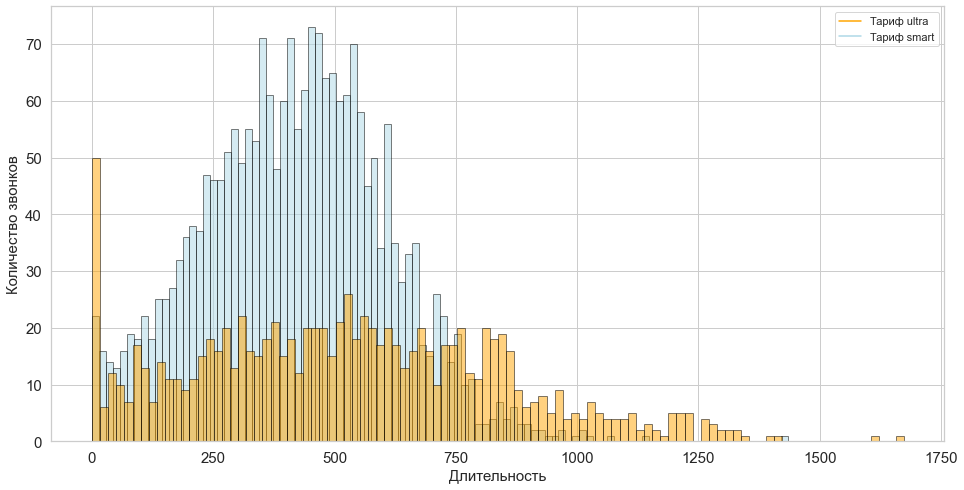

In [63]:
df_all[df_all['tariff'] == 'smart']['duration_month'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black') 

df_all[df_all['tariff'] == 'ultra']['duration_month'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black') 

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Длительность', fontsize=15)
plt.ylabel('Количество звонков', fontsize=15)
plt.show()

In [64]:
df_all[df_all['duration_month'] == 0]['duration_month'].count()

46

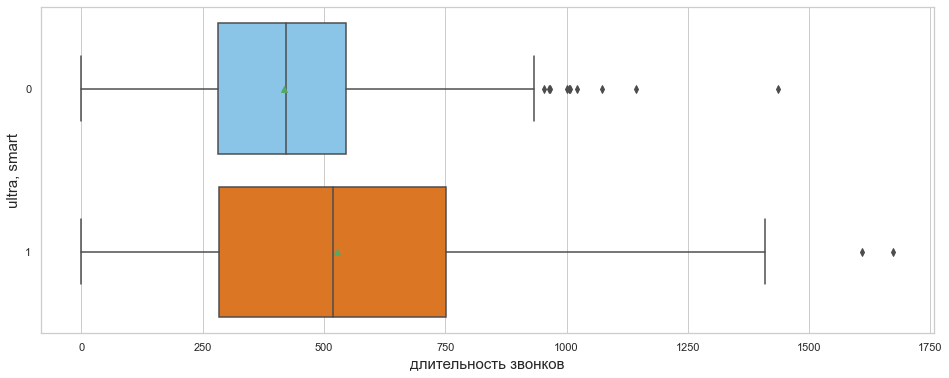

In [65]:
data1 = df_all[df_all['tariff'] == 'smart']['duration_month']
data2 = df_all[df_all['tariff'] == 'ultra']['duration_month']


sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16,6))
sns.boxplot( 
    data=[data1, data2],orient='h',
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)


plt.ylabel("ultra, smart", size = 15)
plt.xlabel("длительность звонков", size = 15);

Посмотрим описание длительности звонков тарифа `smart`:

In [66]:
df_all[df_all['tariff'] == 'smart']['duration_month'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration_month,2229.0,417.934948,190.31373,0.0,282.0,422.0,545.0,1435.0


Посмотрим описание длительности звонков тарифа `ultra`:

In [67]:
df_all[df_all['tariff'] == 'ultra']['duration_month'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration_month,985.0,526.62335,317.606098,0.0,284.0,518.0,752.0,1673.0


In [68]:
#test
x=df_all[df_all['tariff'] == 'ultra']['duration_month']
variance = np.var(x)
variance

100771.2236172022

Посчитаем среднее количество, дисперсию и стандартное отклонение длительности звонков за месяц по тарифам:

In [69]:
duration_month_stat = df_all.pivot_table(index = 'tariff', values = 'duration_month', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
duration_month_stat.columns = ['Кол-во звонков в месяц', 'Средняя длительность звонков', 'Дисперсия', 'Стандартное отклонение']

duration_month_stat

,Кол-во звонков в месяц,Средняя длительность звонков,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,418.0,36219.0,190.0
ultra,985,527.0,100874.0,318.0


Распределим абонентов тарифа `smart` по группам в зависимости от длительности звонков:

In [70]:
def count_duration_month_smart(row):
        
    if row == 0:
        return 'Абонент не использует звонки'
    
    if row <= 500:
        return 'В рамках тарифа, звонки до 500 минут'
    
    if row <= 1000:
        return 'Не в рамках тарифа, звонки от 500 до 1000 минут'
    
    if row >= 1500:
        return 'Не в рамках тарифа, звонки более 1500 минут'

    
df_all['count_duration_month_smart'] = df_all[df_all['tariff'] == 'smart']['duration_month'].apply(count_duration_month_smart)
#df_all['count_duration_month_smart'].value_counts().to_frame()


Добавим таблицу с категориями:

In [71]:
#!
per_calls_smart = (df_all.groupby("count_duration_month_smart").agg({"duration_month" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_calls_smart.columns = ['% по группам']
per_calls_smart

,% по группам
count_duration_month_smart,
Абонент не использует звонки,0.00
"В рамках тарифа, звонки до 500 минут",49.93
"Не в рамках тарифа, звонки от 500 до 1000 минут",50.07


Примерно 50% абонентов тарифа `smart` превышают в лимит по звонкам.

Распределим абонентов тарифа `ultra` по группам в зависимости от длительности звонков:

In [72]:
def count_duration_month_ultra(row):

    if row == 0:
        return 'Абонент не использует звонки'
    
    if row <= 1500:
        return 'В рамках тарифа, звонки до 1500 минут'
    
    if row <= 3000:
        return 'В рамках тарифа, звонки до 3000 минут'
    
    if row > 3000:
        return 'Не в рамках тарифа, звонки более 3000 минут'

df_all['count_duration_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['duration_month'].apply(count_duration_month_ultra)
#df_all['count_duration_month_smart'].value_counts().to_frame()


Добавим таблицу с категориями в процентах:

In [73]:
#!
per_calls_ultra = (df_all.groupby("count_duration_month_ultra").agg({"duration_month" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_calls_ultra.columns = ['% по группам']
per_calls_ultra

,% по группам
count_duration_month_ultra,
Абонент не использует звонки,0.00
"В рамках тарифа, звонки до 1500 минут",99.37
"В рамках тарифа, звонки до 3000 минут",0.63


Абоненты тарифа `ultra` не превышают лимит по звонкам.

<a name="3.2"></a>
### Анализ сообщений по тарифам.

Построим гистограмму распределения количества сообщений:

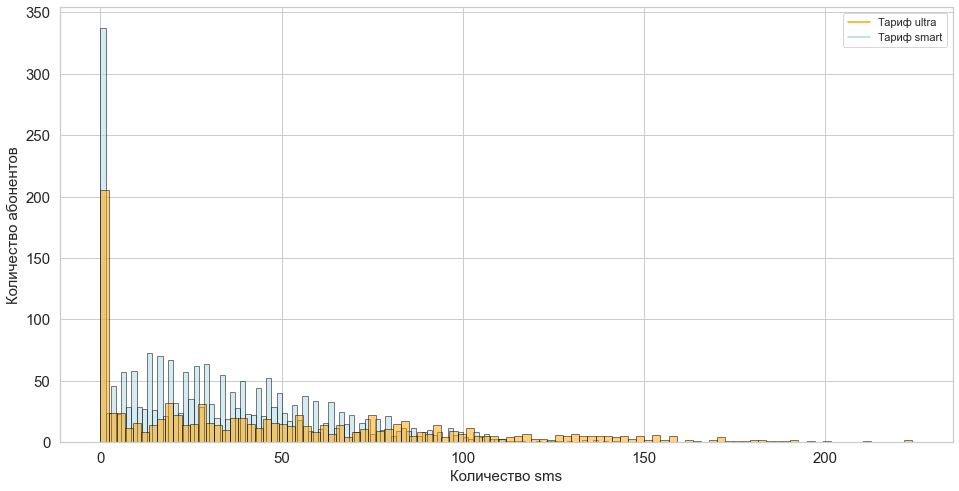

In [74]:
df_all[df_all['tariff'] == 'smart']['count_sms'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black') 

df_all[df_all['tariff'] == 'ultra']['count_sms'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black') 

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Количество sms', fontsize=15)
plt.ylabel('Количество абонентов', fontsize=15)
plt.show()

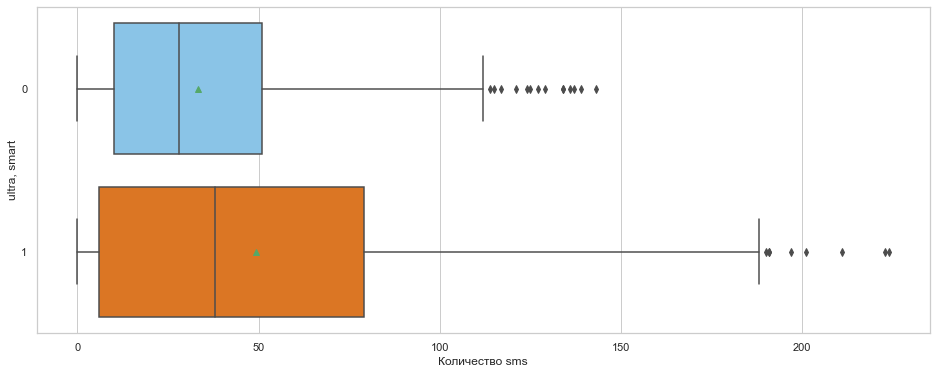

In [75]:
data1 = df_all[df_all['tariff'] == 'smart']['count_sms']
data2 = df_all[df_all['tariff'] == 'ultra']['count_sms']

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16,6))
sns.boxplot(
    data=[data1, data2],orient='h',
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)


plt.ylabel("ultra, smart")
plt.xlabel("Количество sms");

Посмотрим описание количества сообщений:

In [76]:
df_all[df_all['tariff'] == 'smart']['count_sms'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
count_sms,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0


In [77]:
df_all[df_all['tariff'] == 'ultra']['count_sms'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
count_sms,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0


Посчитаем среднее количество, дисперсию и стандартное отклонение количества сообщений за месяц по тарифам:

In [78]:
count_sms_stat = df_all.pivot_table(index = 'tariff', values = 'count_sms', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
count_sms_stat.columns = ['Кол-во смс в месяц', 'Среднее кол-во', 'Дисперсия', 'Стандартное отклонение']

count_sms_stat

,Кол-во смс в месяц,Среднее кол-во,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,33.0,797.0,28.0
ultra,985,49.0,2285.0,48.0


Распределим абонентов тарифа `smart` по группам в зависимости от использования sms:

In [79]:
def count_sms_month_smart(row):
    
    if row == 0:
        return 'Не использует sms'
    
    if row <= 50:
        return 'В рамках тарифа, sms до 50'
    
    if row >= 50:
        return 'Не в рамках тарифа, sms от 50 до 100'
    
    if row > 100:
        return 'Не в рамках тарифа, sms более 100'

    
df_all['count_sms_month_smart'] = df_all[df_all['tariff'] == 'smart']['count_sms'].apply(count_sms_month_smart)


Добавим таблицу с категориями:

In [80]:


category_sms_smart = df_all.pivot_table(index = 'count_sms_month_smart', values = 'count_sms', 
                            aggfunc = ['sum','mean']).round(3)
category_sms_smart.columns = ['Кол-во sms', 'Среднее количество sms']
category_sms_smart

,Кол-во sms,Среднее количество sms
count_sms_month_smart,,
"В рамках тарифа, sms до 50",33285,24.510
"Не в рамках тарифа, sms от 50 до 100",41128,72.922
Не использует sms,0,0.000


In [81]:
per_sms_smart = (df_all.groupby("count_sms_month_smart").agg({"count_sms" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_sms_smart.columns = ['% по группам']
per_sms_smart

,% по группам
count_sms_month_smart,
"В рамках тарифа, sms до 50",44.73
"Не в рамках тарифа, sms от 50 до 100",55.27
Не использует sms,0.00


Примерно 55% абонентов тарифа `smart` превышают лимит по sms.

Распределим абонентов тарифа `ultra` по группам в зависимости от использования sms:

In [82]:
def count_sms_month_ultra(row):
    if row == 0:
        return 'Абонент не использует смс'
    
    if row <= 1000:
        return 'В рамках тарифа, sms до 1000'

    if row > 1000:
        return 'Не в рамках тарифа, sms более 1000'

    
df_all['count_sms_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['count_sms'].apply(count_sms_month_ultra)

In [83]:
per_sms_ultra = (df_all.groupby("count_sms_month_ultra").agg({"count_sms" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_sms_ultra.columns = ['% по группам']
per_sms_ultra

,% по группам
count_sms_month_ultra,
Абонент не использует смс,0.0
"В рамках тарифа, sms до 1000",100.0


Абоненты тарифа `ultra` не превышают лимит тарифа по sms.

<a name="3.3"></a>
### Анализ трафика по тарифам.

Построим графики распределения интернет трафика:

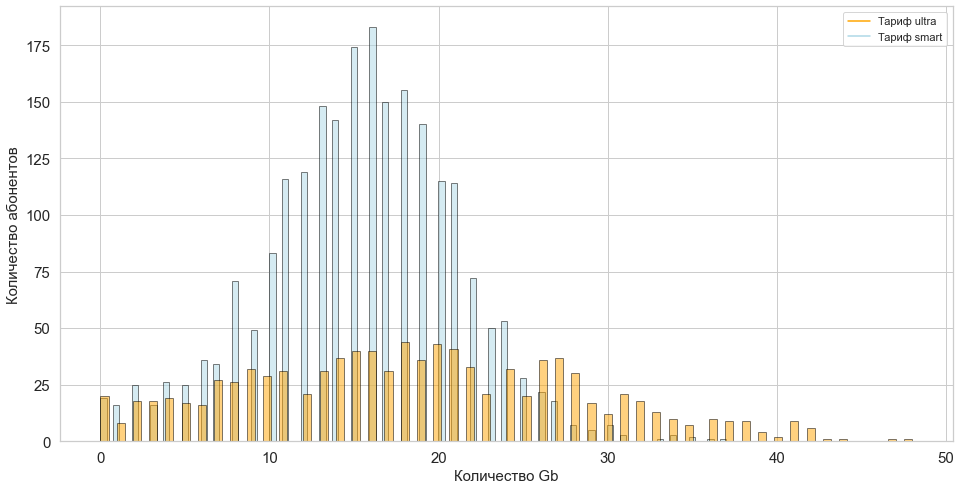

In [84]:
df_all[df_all['tariff'] == 'smart']['gb_used'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='lightblue', ec='black')

df_all[df_all['tariff'] == 'ultra']['gb_used'].hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5,
                          ylabelsize =15, facecolor='orange', ec='black')

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()

plt.suptitle('')
plt.xlabel('Количество Gb', fontsize=15)
plt.ylabel('Количество абонентов', fontsize=15)
plt.show()

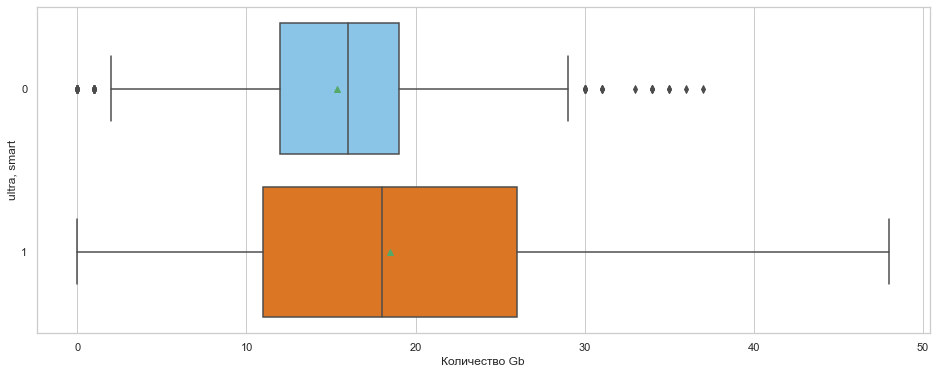

In [85]:
data1 = df_all[df_all['tariff'] == 'smart']['gb_used']
data2 = df_all[df_all['tariff'] == 'ultra']['gb_used']

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16,6))
sns.boxplot(
    data=[data1, data2],orient='h',
    palette=[sns.xkcd_rgb["lightblue"], sns.xkcd_rgb["orange"]], 
    showmeans=True
)




plt.ylabel("ultra, smart")
plt.xlabel("Количество Gb");

Посмотрим описание использованного трафика:

In [86]:
df_all[df_all['tariff'] == 'smart']['gb_used'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
gb_used,2229.0,15.329744,5.744588,0.0,12.0,16.0,19.0,37.0


In [87]:
df_all[df_all['tariff'] == 'ultra']['gb_used'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
gb_used,985.0,18.505584,9.831932,0.0,11.0,18.0,26.0,48.0


Посчитаем среднее количество, дисперсию и стандартное отклонение трафика за месяц по тарифам:

In [88]:
gb_used_stat = df_all.pivot_table(index = 'tariff', values = 'gb_used', 
                            aggfunc = ['count','mean', 'var', 'std']).round(0)
gb_used_stat.columns = ['Кол-во Гб в месяц', 'Среднее кол-во', 'Дисперсия', 'Стандартное отклонение']

gb_used_stat

,Кол-во Гб в месяц,Среднее кол-во,Дисперсия,Стандартное отклонение
tariff,,,,
smart,2229,15.0,33.0,6.0
ultra,985,19.0,97.0,10.0


Распределим абонентов тарифа `smart` по группам в зависимости от использования интернет-трафика:

In [89]:
def count_gb_month_smart(row):
    if row == 0:
        return 'Трафик не используется'
    
    if row <= 15:
        return 'В рамках тарифа, трафик до 15 Гб'
    
    if row > 15:
        return 'Не в рамках тарифа, трафик от 15 до 30 Гб'
        
    if row >= 45:
        return 'Не в рамках тарифа, трафик от 30 до 45 Гб'
    
    if row >= 60:
        return 'Не в рамках тарифа, трафик от 45 до 60 Гб'
    


df_all['count_gb_month_smart'] = df_all[df_all['tariff'] == 'smart']['gb_used'].apply(count_gb_month_smart)

In [90]:
category_gb_smart = df_all.pivot_table(index = 'count_gb_month_smart', values = 'gb_used', 
                            aggfunc = ['count','mean']).round(2)
category_gb_smart.columns = ['Кол-во Гб в месяц', 'Среднее количество Гб']
category_gb_smart

,Кол-во Гб в месяц,Среднее количество Гб
count_gb_month_smart,,
"В рамках тарифа, трафик до 15 Гб",1080,10.98
"Не в рамках тарифа, трафик от 15 до 30 Гб",1130,19.74
Трафик не используется,19,0.00


In [91]:
per_gb_smart = (df_all.groupby("count_gb_month_smart").agg({"gb_used" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_gb_smart.columns = ['% по группам']
per_gb_smart

,% по группам
count_gb_month_smart,
"В рамках тарифа, трафик до 15 Гб",34.71
"Не в рамках тарифа, трафик от 15 до 30 Гб",65.29
Трафик не используется,0.00


Примерно 65% абонентов тарифа `smart` превышают лимит по интернет-трафику.

Распределим абонентов тарифа `ultra` по группам в зависимости от использования интернет-трафика:

In [92]:
def count_gb_month_ultra(row):
    if row <= 30:
        return 'В рамках тарифа, трафик до 30 Гб'
    
    if row >= 30:
        return 'Не в рамках тарифа, трафик от 30 Гб'
    


df_all['count_gb_month_ultra'] = df_all[df_all['tariff'] == 'ultra']['gb_used'].apply(count_gb_month_ultra)

In [93]:
category_gb_ultra = df_all.pivot_table(index = 'count_gb_month_ultra', values = 'gb_used', 
                            aggfunc = ['count','mean']).round(2)
category_gb_ultra.columns = ['Кол-во Гб в месяц', 'Среднее количество Гб']
category_gb_ultra

,Кол-во Гб в месяц,Среднее количество Гб
count_gb_month_ultra,,
"В рамках тарифа, трафик до 30 Гб",863,16.12
"Не в рамках тарифа, трафик от 30 Гб",122,35.37


In [94]:
per_gb_ultra = (df_all.groupby("count_gb_month_ultra").agg({"gb_used" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_gb_ultra.columns = ['% по группам']
per_gb_ultra

,% по группам
count_gb_month_ultra,
"В рамках тарифа, трафик до 30 Гб",76.33
"Не в рамках тарифа, трафик от 30 Гб",23.67


Почти 24% абонентов тарифа `ultra` превышают лимит по интернет-трафику.

<a name="3.4"></a>
### Общий анализ

Построим график переплат:

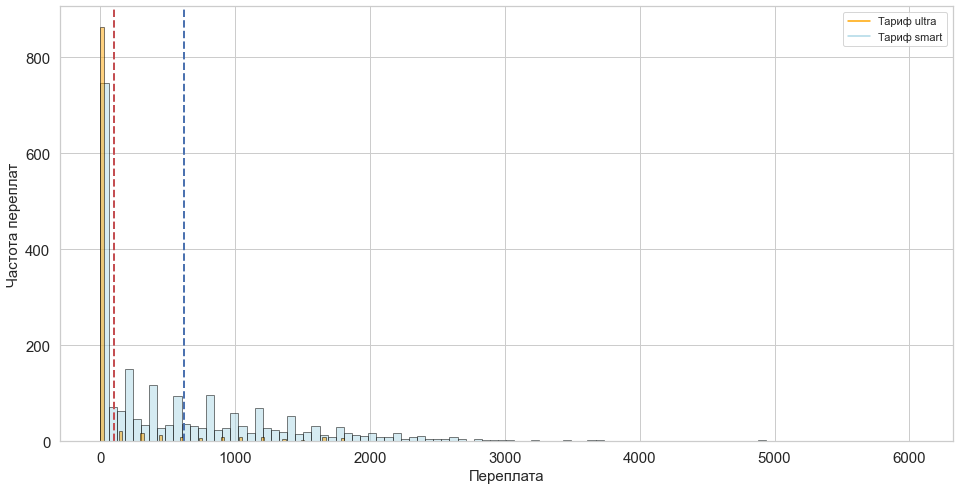

In [95]:
#график переплат по тарифам 
x = df_all[df_all['tariff'] == 'smart']['above_tariff']
y = df_all[df_all['tariff'] == 'ultra']['above_tariff']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

#здесь не работает 
#plt.text(x.mean(), max_ylim, 'Среднее smart: {:.0f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'Среднее ultra: {:.0f}'.format(y.mean()), fontsize=12).set_rotation(15)

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Переплата', fontsize=15)
plt.ylabel('Частота переплат', fontsize=15)
plt.show()

In [96]:
above_tariff = df_all.pivot_table(index = 'tariff', values = 'above_tariff', 
                            aggfunc = ['count','sum']).round(2)
above_tariff.columns = ['Количество переплат', 'Сумма переплат']
above_tariff

,Количество переплат,Сумма переплат
tariff,,
smart,2229,1388601
ultra,985,98250


Определим прибыль по каждому тарифу:

In [97]:
tariff_profit = df_all.pivot_table(index = 'tariff', values = 'profit_month', aggfunc='sum')
tariff_profit.columns = ['Годовая прибыль по тарифу, руб.']
tariff_profit

,"Годовая прибыль по тарифу, руб."
tariff,
smart,2614551
ultra,2019000


Определим % тарифа в прибыли:

In [98]:
per_tariff_profit = (df_all.groupby("tariff").agg({"profit_month" : "sum"}).apply(lambda x: 100*x/x.sum())).round(2)
per_tariff_profit.columns = ['% по тарифу']
per_tariff_profit

,% по тарифу
tariff,
smart,56.43
ultra,43.57


Посмотрим на использование опций тарифа по месяцам, для абонентов тарифа `smart`:

In [99]:
columns = ['count_calls', 'count_sms', 'duration_month', 'gb_used']
stat_smart_month = pd.pivot_table(data=df_month.loc[df_month['tariff']=='smart'],
                               values=columns, index = 'month')#, aggfunc=sum
stat_smart_month

,count_calls,count_sms,duration_month,gb_used
month,,,,
1,27.676471,18.235294,203.852941,7.735294
2,40.189655,24.086207,298.689655,10.844828
3,54.324675,31.857143,390.051948,14.233766
4,51.312500,30.741071,367.133929,12.625000
5,55.241135,33.773050,387.361702,14.907801
6,55.548780,33.402439,395.640244,14.951220
7,56.726368,33.751244,408.353234,14.875622
8,58.978723,33.638298,421.468085,15.740426
9,59.546154,33.638462,428.611538,15.392308


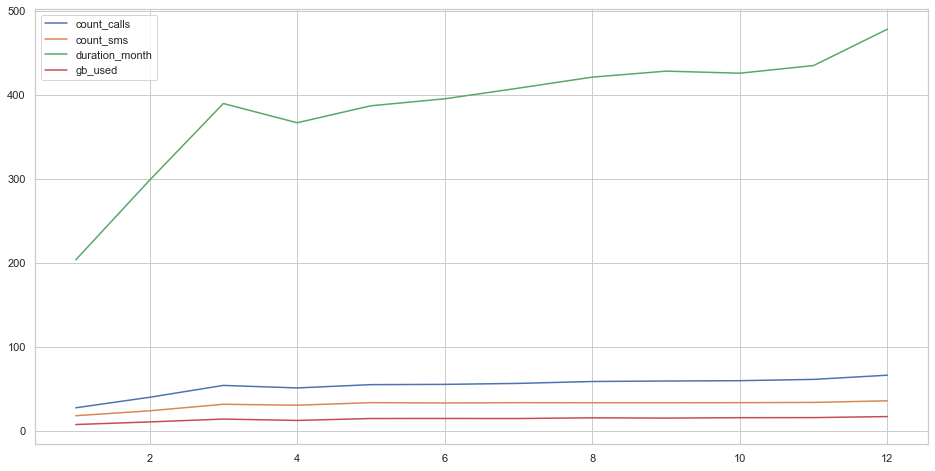

In [100]:
stat_smart_month.plot.line(figsize= (16,8), grid=True) 

plt.plot([], )
plt.plot([], )
plt.legend()

plt.suptitle('')
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

In [1]:
#test
#import seaborn as sns
#import matplotlib.pyplot as plt
#from plotnine.data import diamonds # dataset

# Set figure size for the notebook
#plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
#sns.set(style="whitegrid")

# Without transparency
#sns.kdeplot(data=stat_smart_month, cut=0, fill=True, common_norm=False, alpha=0.5)
#plt.show()

Посмотрим на использование опций тарифа по месяцам, для абонентов тарифа `ultra`:

In [102]:
columns = ['count_calls', 'count_sms', 'duration_month', 'gb_used']

stat_ultra_month = pd.pivot_table(data=df_month.loc[df_month['tariff']=='ultra'],
                             values=columns, index = 'month')#, aggfunc=sum
stat_ultra_month

,count_calls,count_sms,duration_month,gb_used
month,,,,
1,59.444444,33.777778,428.111111,12.222222
2,41.541667,21.958333,297.125000,11.083333
3,67.675676,32.297297,489.648649,16.648649
4,64.090909,31.563636,458.018182,15.963636
5,72.507463,37.850746,510.328358,18.402985
6,66.738095,41.726190,479.702381,17.952381
7,75.780220,49.846154,545.791209,19.516484
8,71.289720,48.439252,510.775701,18.607477
9,74.600000,52.286957,539.443478,18.252174


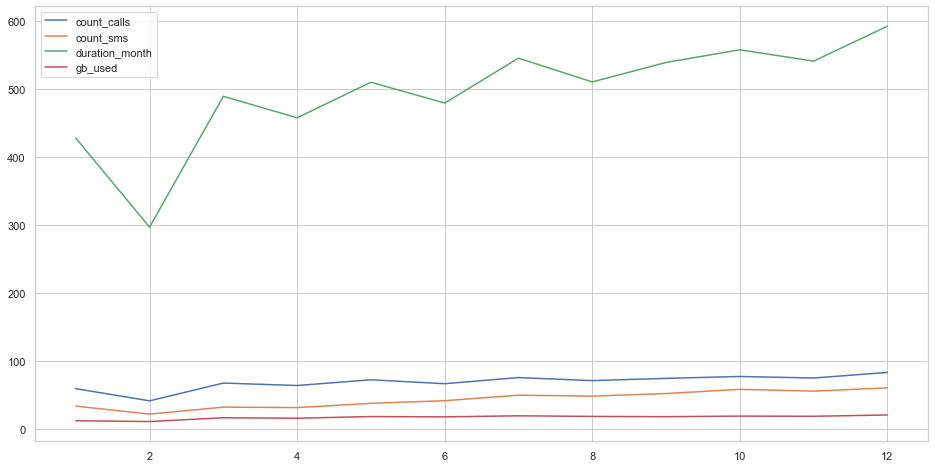

In [103]:
stat_ultra_month.plot.line(figsize= (16,8), grid=True) 


plt.plot([], )
plt.plot([], )
plt.legend()


plt.suptitle('')
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

Посчитаем прибыльность каждой группы абонентов:

Количество абонентов каждого тарифа:

In [104]:
users['tariff'].value_counts().to_frame()

,tariff
smart,351
ultra,149


In [105]:
tariff_profit 

,"Годовая прибыль по тарифу, руб."
tariff,
smart,2614551
ultra,2019000


In [106]:
smart_profit_year = 2614551/351
print('Срений годовой платеж абонета тарифа smart', smart_profit_year)

Срений годовой платеж абонета тарифа smart 7448.863247863248


In [107]:
ultra_profit_year = 2019000/149
print('Срений годовой платеж абонета тарифа ultra', ultra_profit_year)

Срений годовой платеж абонета тарифа ultra 13550.335570469799


Средний годовой платеж абонента тарифа `ultra` в 1.8 раза больше, чем абонента тарифа `smart`

<a name="3.5"></a>
### Вывод

- *Средняя длительность звонков за месяц тарифа:*\
`smart` 418\
`ultra` 527
- *Дисперсия:*\
`smart` 36219\
`ultra` 100874
- *Стандартное отклонение:*\
`smart` 190\
`ultra` 318


- *Среднее количество смс за месяц тарифа:*\
`smart` 33\
`ultra` 49
- *Дисперсия:*\
`smart` 797\
`ultra` 2285
- *Стандартное отклонение:*\
`smart` 28\
`ultra` 48


- *Среднее количество Гб в месяц тарифа:*\
`smart` 15\
`ultra` 19
- *Дисперсия:*\
`smart` 33\
`ultra` 97
- *Стандартное отклонение:*\
`smart` 6\
`ultra` 10


Примерно 50% абонентов тарифа `smart` превышает лимит по звонкам.\
Примерно 55% абонентов тарифа `smart` превышают лимит по sms.\
Примерно 65% абонентов тарифа `smart` превышают лимит по интернет-трафику.


Абоненты тарифа `ultra` не превышают лимит по звонкам.\
Абоненты тарифа `ultra` не превышают лимит тарифа по sms.\
Почти 24% абонентов тарифа `ultra` превышают лимит по интернет-трафику.

Большую долю прибыли принелси абоненты тарифа `smart` (56%)

Абоненты тарифа `ultra` платят в среднем в 1.8 раза больше, чем абоненты тарифа `smart`

В течении года быстрее всего возрастала длительность звонков по всем тарифам

<a name="4"></a>
## Проверка гипотез

<a name="4.1"></a>
### Cредняя выручка абонентов тарифов «Ультра» и «Смарт» различаются

Отобразим графически распределение выручки по тарифам:

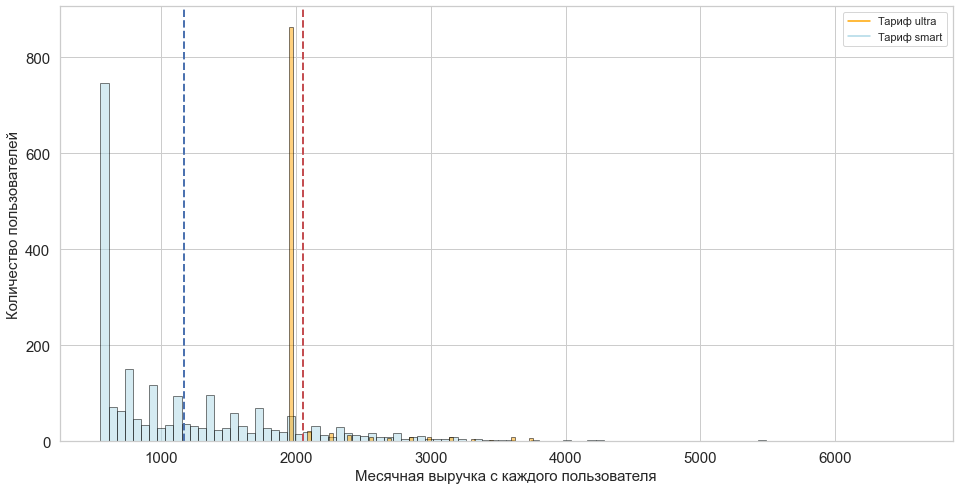

In [108]:
x = df_all[df_all['tariff'] == 'smart']['profit_month']
y = df_all[df_all['tariff'] == 'ultra']['profit_month']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

# нр
#plt.text(x.mean(), max_ylim, 'Среднее smart: {:.0f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'Среднее ultra: {:.0f}'.format(y.mean()), fontsize=12).set_rotation(15)

plt.plot([], c='orange', label='Тариф ultra')
plt.plot([], c='lightblue', label='Тариф smart')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Месячная выручка с каждого пользователя', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.show()

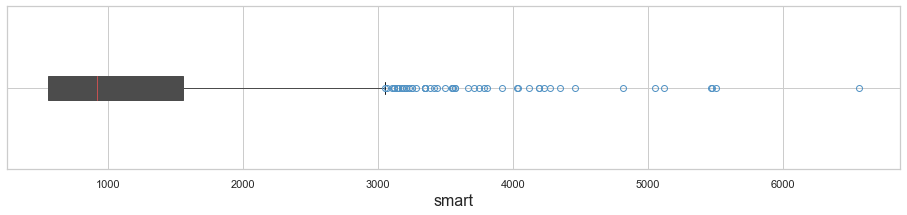

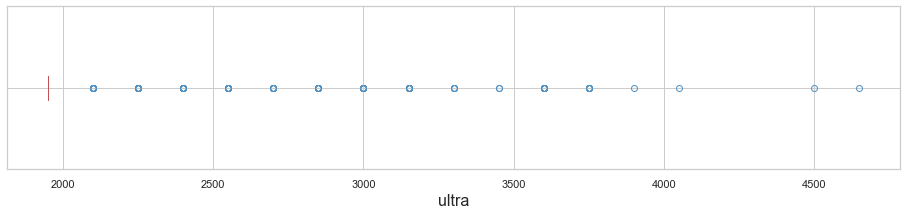

In [109]:
ax=df_all[df_all['tariff'] == 'smart'].boxplot('profit_month', vert=False, figsize=(16,3), patch_artist=True,
              flierprops=dict(markeredgecolor="#5192c4"),
                medianprops=dict(color='#c45151'))
ax.set_yticklabels([''])
plt.xlabel('smart', fontsize=16)
plt.show()

ax=df_all[df_all['tariff'] == 'ultra'].boxplot('profit_month', vert=False, figsize=(16,3), patch_artist=True,
              flierprops=dict(markeredgecolor="#5192c4"),
                medianprops=dict(color='#c45151'))
ax.set_yticklabels([''])
plt.xlabel('ultra', fontsize=16)
plt.show()

Отобразим описание средней выручки тарифа `smart`:

In [110]:
df_all[df_all['tariff'] == 'smart']['profit_month'].describe()

count    2229.00000
mean     1172.97039
std       757.42226
min       550.00000
25%       550.00000
50%       912.00000
75%      1550.00000
max      6570.00000
Name: profit_month, dtype: float64

Отобразим описание средней выручки тарифа `ultra`:

In [111]:
df_all[df_all['tariff'] == 'ultra']['profit_month'].describe()

count     985.000000
mean     2049.746193
std       336.140270
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4650.000000
Name: profit_month, dtype: float64

Определим среднюю выручку по тарифам:

In [112]:
profit_month_stat = df_all.pivot_table(index = 'tariff', values = 'profit_month', aggfunc = ['mean']).round(0)
profit_month_stat.columns = ['Средняя выручка ']

profit_month_stat

,Средняя выручка
tariff,
smart,1173.0
ultra,2050.0


In [113]:
profit_smart = df_all[df_all['tariff'] == 'smart']['profit_month']

In [114]:
profit_ultra = df_all[df_all['tariff'] == 'ultra']['profit_month']

Прверим гипотезу:
* H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» `не различаются`
* H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» `различаются`

Установим критический уровень значимости `alpha` равный 5%, т.е. ошибка не должна превышать 5%, а верный результат не должен быть менее 95%

In [115]:
alpha = 0.05

results = st.ttest_ind(
    profit_smart,
    profit_ultra
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.421808042890812e-226
Отвергаем нулевую гипотезу


Вывод: Проверка гипотезы подтвердила, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

<a name="4.2"></a>
### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Отобразим графически распределение выручки по Москве и регионам:

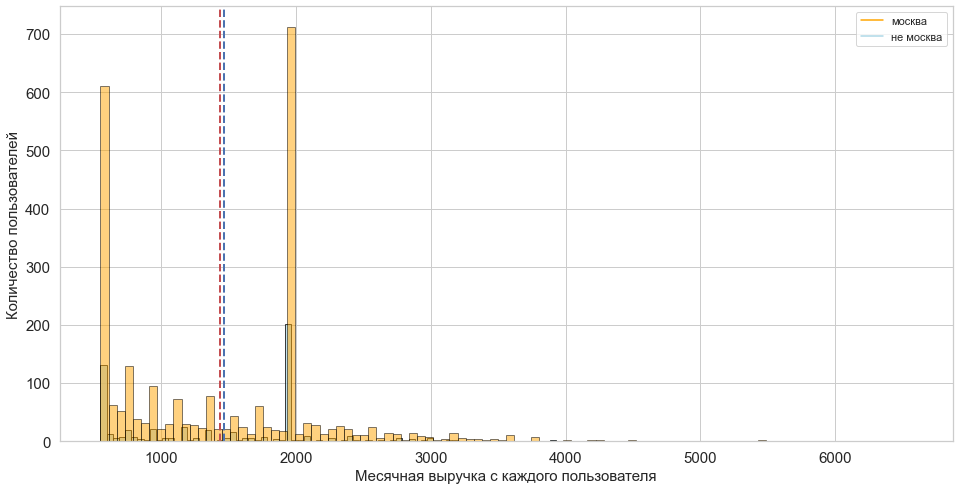

In [116]:
#приведем к нижнему регистру колонку city
df_all['city'] = df_all['city'].str.lower()


x = df_all.query('city == "москва"')['profit_month']
y = df_all.query('city != "москва"')['profit_month']

plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)

# нр
#plt.text(x.mean(), max_ylim, 'москва: {:.1f}'.format(x.mean()), fontsize=12).set_rotation(15)
#plt.text(y.mean(), max_ylim, 'не москва: {:.1f}'.format(y.mean()), fontsize=12).set_rotation(0)

plt.plot([], c='orange', label='москва')
plt.plot([], c='lightblue', label='не москва')
plt.legend()


x.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.75, ylabelsize=15, facecolor='lightblue', ec='black') 

y.hist(bins = 100, figsize= (16,8), xlabelsize = 15, alpha=0.5, ylabelsize=15, facecolor='orange', ec='black') 



plt.suptitle('')
plt.xlabel('Месячная выручка с каждого пользователя', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.show()

Рассчитаем выручку по абонентам из Москвы:

In [117]:
#msk_user = df_all[df_all['city']=='москва']['profit_month']
msk_user = df_all.query('city == "москва"')['profit_month']

Рассчитаем выручку по абонентам не из Москвы:

In [118]:
#no_msk_user =  df_all[df_all['city']!='москва']['profit_month']
no_msk_user = df_all.query('city != "москва"')['profit_month']

Прверим гипотезу:
* H0: средняя выручка пользователей из Москвы `не отличается` от выручки пользователей из других регионов
* H1: средняя выручка пользователей из Москвы `отличается` от выручки пользователей из других регионов


Установим критический уровень значимости `alpha` равный 5%, т.е. ошибка не должна превышать 5%, а верный результат не должен быть менее 95%

In [119]:
alpha = 0.05

results  = st.ttest_ind(
    msk_user, 
    no_msk_user
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3815900154093307
Не получилось отвергнуть нулевую гипотезу


Вывод: Проверка гипотез подтвердила, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

<a name="5"></a>
## Общий вывод

Распределение основных величин тарифов схожее, что говорит о примерно одинаковом поведении абонентов.\
Прибыльность тарифов различается.\
Потребление пакетов услуг по тарифам, абонентов из регионов, схоже с потреблением абонентов из Москвы.\
Абоненты тарифа `smart` активнее используют интернет-трафик.\
Абоненты тарифа `ultra` активнее используют звонки и смс.

Абоненты тарифа `smart` часто превышают лимиты своего тарифа, значит этот тариф не соответствует потреблению абонентов.\
Для удержания абонентов, компания должна предложить оптимальный тариф соответствующий потреблению абонентов и собственной выручке.

